<a href="https://colab.research.google.com/github/richardzefan/Prediksi-Jumlah-Visitor-pada-Barbershop/blob/main/Prediksi_Jumlah_Visitor_pada_Barbershop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BISNIS UNDERSTANDING

**- Bisnis:**

Barbershop ini terletak pada salah satu kota di Jawa Timur, yang dibangun sejak 2021. Selain menerima service haircut, barbershop juga menerima service lain seperti haircolor, hairperming, dll, serta penjualan produk seperti pomade, hairpowder, dsb.



**- Tujuan:**

- Untuk mengoptimalkan stock & ekspansi bisnis, barbershop membutuhkan prediksi secara harian, berapa visitor yang akan datang pada beberapa hari yang akan datang.

- memprediksi jumlah visitor harian pada beberapa hari yang akan datang (30 hari). Salah satunya menggunakan model Time Series (atau bisa menggunakan pendekatan lain sesuai eksplorasi data yang dilakukan)



**- Tambahan informasi (Opini Owner):**

Perbedaan bisnis barbershop dengan bisnis lain adalah adanya peluang bahwa pelanggan akan datang lagi atau tidak. Umumnya pelanggan yang pernah datang lebih dari 1 kali akan menjadi pelanggan tetap dan akan datang kembali. Terdapat juga informasi lain seperti berapa lama seseorang rutin akan datang lagi setelah potong rambut.

Hari weekday atau weekend juga bisa jadi berpengaruh terhadap banyaknya kedatangan customer.

#Data Undestanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Data_Transaksi_Barber.csv")

In [ ]:
traffic = pd.read_csv("/content/drive/MyDrive/Dataset/data_googlebusiness.csv")

In [ ]:
price = pd.read_csv("/content/drive/MyDrive/Dataset/data_pricelist.csv")

In [ ]:
df.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
0,1.0,26908171Haety,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2.0,26924970Riand,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,3.0,25789556Buawa,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
3,4.0,26770753Litan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
4,5.0,26770753Tatan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


In [ ]:
traffic.head()

,Start Date,End Date,Overall rating,Total searches,Direct searches,Discovery searches,Total views,Search views,Maps views,Total actions,Website actions,Directions actions,Phone call actions
0,NaN,NaN,Overall rating of this listing as of the date ...,Number of times customers found this listing b...,Number of times customers found this listing b...,Number of times customers found this listing b...,Number of times this listing has been viewed o...,Number of times this listing has been viewed o...,Number of times this listing has been viewed o...,Number of times customers have taken action on...,Number of times customers have visited the web...,Number of times customers have requested direc...,Number of times customers have called the busi...
1,15/08/2021,28/08/2021,5,155,22,133,366,6,360,4,1,2,1
2,29/08/2021,11/09/2021,5,2216,715,1501,2676,339,2337,25,5,14,6
3,12/09/2021,25/09/2021,5,3222,461,2761,4037,303,3734,19,4,13,2
4,26/09/2021,09/10/2021,5,2886,404,2482,3538,220,3318,16,2,14,0


In [ ]:
price.head()

,Product/Service,Price
0,Haircut,35000
1,Haircolor,60000-175000
2,Creambath,70000
3,Shaving,10000
4,Vitamin,90000


#DATA CLEANSING

In [ ]:
df.isnull().sum()

Urutan              3
id_cust             3
Status              3
Cukur_ke           56
Capster             3
Hari                0
Tanggal             0
keterangan       2046
Bayar               0
Haircut             0
Haircolor        2012
Creambath        2040
Shaving          2026
Vitamin          2039
Powder A         2017
Powder B         2042
Pomade 1         2039
Pomade 2         2047
Pomade 3         2048
Pomade 4         2049
Pomade 5         2037
Pomade 6         2030
Pomade 7         2048
Pomade 8         2049
Pomade 9         2044
Conditioner      2039
Hairtonic        1905
Total Payment       0
dtype: int64

In [ ]:
df['Tanggal']=pd.to_datetime(df['Tanggal'], infer_datetime_format=True)
df=df.set_index(['Tanggal'])

In [ ]:
df.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,keterangan,Bayar,Haircut,Haircolor,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-08-16,1.0,26908171Haety,baru,1.0,irh,senin,NaN,Cash,30000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2021-08-16,2.0,26924970Riand,baru,1.0,irh,senin,NaN,Cash,30000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2021-08-16,3.0,25789556Buawa,baru,1.0,irh,senin,NaN,Cash,30000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2021-08-17,4.0,26770753Litan,baru,1.0,irh,selasa,NaN,Cash,30000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2021-08-17,5.0,26770753Tatan,baru,1.0,irh,selasa,NaN,Cash,30000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


In [ ]:
df = df[['Hari','id_cust','Status','Cukur_ke']]

In [ ]:
df.head()

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-08-16,senin,26908171Haety,baru,1.0
2021-08-16,senin,26924970Riand,baru,1.0
2021-08-16,senin,25789556Buawa,baru,1.0
2021-08-17,selasa,26770753Litan,baru,1.0
2021-08-17,selasa,26770753Tatan,baru,1.0


In [ ]:
#cek missing value
df.isnull().sum()

Hari         0
id_cust      3
Status       3
Cukur_ke    56
dtype: int64

In [ ]:
df[df['Cukur_ke'].isnull()]

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-21,kamis,NaN,NaN,NaN
2021-10-22,jumat,NaN,NaN,NaN
2021-10-23,sabtu,NaN,NaN,NaN
2021-11-11,kamis,25515394Heawa,lama,NaN
2021-11-11,kamis,M.akt,lama,NaN
2021-11-11,kamis,Muizk,lama,NaN
2021-11-17,rabu,26936508Lione,lama,NaN
2021-11-17,rabu,26920256Izhar,lama,NaN
2021-11-18,kamis,Riifk,lama,NaN


In [ ]:
#mengisi kolom cukur ke berdasarkan kolom status
df['Cukur_ke'].fillna(1,inplace=True)

In [ ]:
df.isnull().sum() #ternyata nilai NaN masih ada, yuk cari tau

Hari        0
id_cust     3
Status      3
Cukur_ke    0
dtype: int64

In [ ]:
df[df['Status'].isnull()] #menampilkan nilai NaN pada kolom Status

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-21,kamis,NaN,NaN,1.0
2021-10-22,jumat,NaN,NaN,1.0
2021-10-23,sabtu,NaN,NaN,1.0


In [ ]:
#ternyata 6 nilai yang missing berada pada rows yang sama
#kita isi pada kolom status jika nilai cukur yaitu satu maka diisi dengan baru
df['Status'].fillna('baru',inplace=True)

In [ ]:
df.isnull().sum()

Hari        0
id_cust     3
Status      0
Cukur_ke    0
dtype: int64

In [ ]:
df[df['id_cust'].isnull()] #menampilkan nilai NaN pada kolom id_cust

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-21,kamis,NaN,baru,1.0
2021-10-22,jumat,NaN,baru,1.0
2021-10-23,sabtu,NaN,baru,1.0


In [ ]:
df['id_cust'].index[df['id_cust'].isnull()] #index missingvalue pada kolom id_cust

DatetimeIndex(['2021-10-21', '2021-10-22', '2021-10-23'], dtype='datetime64[ns]', name='Tanggal', freq=None)

In [ ]:
#karena kolom status diisi dengan baru maka berarti id_custnya juga harus berbeda
#oleh karena itu kita mengisi setiap id_cust pada tiap baris dengan id yang berbeda

idx = df['id_cust'].index[df['id_cust'].isnull()]
total_nan_len = len(idx)
first_nan = total_nan_len//3
# fill baris pertama
df.loc[idx[0:first_nan], 'id_cust'] = '24568345Pedro'
# fill baris kedua
df.loc[idx[first_nan:total_nan_len-1], 'id_cust'] = '24556745Poli'
#fill baris ketiga
df.loc[idx[total_nan_len-1:total_nan_len], 'id_cust'] = '34556678Gilbert'

In [ ]:
df[df['id_cust']== '24556745Poli']

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-22,jumat,24556745Poli,baru,1.0


In [ ]:
df[df['id_cust']== '34556678Gilbert']

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-23,sabtu,34556678Gilbert,baru,1.0


In [ ]:
df[df['id_cust']== '24568345Pedro']

,Hari,id_cust,Status,Cukur_ke
Tanggal,,,,
2021-10-21,kamis,24568345Pedro,baru,1.0


In [ ]:
df.isnull().sum() #sudah tidak ada missing value

Hari        0
id_cust     0
Status      0
Cukur_ke    0
dtype: int64

In [ ]:
#kemudian kita groupby kolom tanggal dan id_cust 
#dengan menampilkan uniqe value yang akan menghitung/menjumlahkan berapa pelanggan/visitor
#dengan id yang berbeda di setiap tanggal

df = df.groupby('Tanggal')[['id_cust']].nunique()

In [ ]:
df.head()

,id_cust
Tanggal,
2021-08-16,3
2021-08-17,5
2021-08-18,5
2021-08-19,3
2021-08-21,11


In [ ]:
data_count = df['id_cust']

In [ ]:
data_count.head()

Tanggal
2021-08-16     3
2021-08-17     5
2021-08-18     5
2021-08-19     3
2021-08-21    11
Name: id_cust, dtype: int64

#Check Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

<function pandas.plotting._misc.register>

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


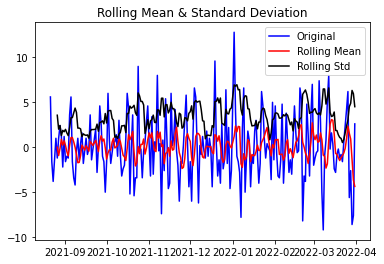

ADF Statistic: -4.237084038604073
p-value: 0.0005698699340420037
Critical Values:
	1%: -3.4624988216864776
	5%: -2.8756749365852587
	10%: -2.5743041549627677


In [ ]:
data = df['id_cust'] 
rolling_mean = data.rolling(window=5).mean()
data_minus_mean = data - rolling_mean
data_minus_mean.dropna(inplace=True)    
get_stationarity(data_minus_mean)

ADF test menunjukkan p-value < 0.05 sehingga kita menolak null hypothesis. Menunjukkan bahwa series ini *sudah stasioner*.

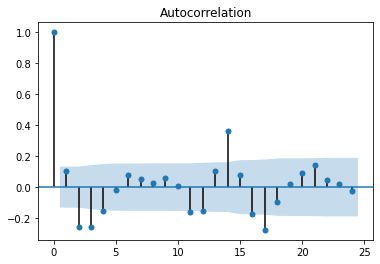

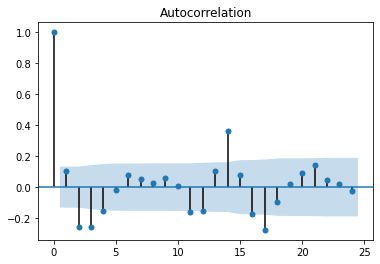

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf untuk parameter q
#ARIMA(p,d,q)

plot_acf(data_minus_mean)

q = 0-4

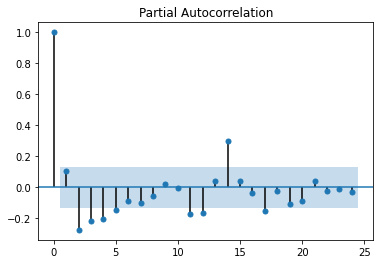

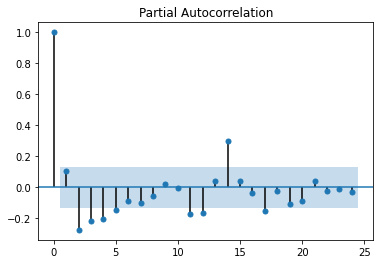

In [ ]:
#plot_pacf untuk parameter p

plot_pacf(data_minus_mean)

p = 0-5

#ARIMA MODEL

In [ ]:
p_val= range(0,6)
d_val = range(0,3)
q_val = range(0,5)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as numpy
import warnings
warnings.filterwarnings('ignore')

for p in p_val:
  for d in d_val:
    for q in q_val:
      order=(p,d,q)
      train,test=data[0:201],data[201:224]
      predictions=list()
      for i in range(len(test)):
        try:
          model = ARIMA(train,order)
          model_fit = model.fit(disp=0)
          pred_y=model_fit.forecast()[0]
          predictions.append(pred_y)
          error=mean_squared_error(test,predictions)
          print('ARIMA%s  RMSE = %.2f'% (order,error))
         
        except:
          continue


ARIMA(0, 0, 1)  RMSE = 94.85
ARIMA(0, 0, 2)  RMSE = 97.08
ARIMA(0, 0, 3)  RMSE = 93.97
ARIMA(0, 0, 4)  RMSE = 52.20
ARIMA(0, 1, 1)  RMSE = 27.25
ARIMA(0, 1, 2)  RMSE = 32.90
ARIMA(0, 2, 1)  RMSE = 122.81
ARIMA(1, 0, 0)  RMSE = 93.74
ARIMA(1, 0, 1)  RMSE = 116.02
ARIMA(1, 0, 4)  RMSE = 97.13
ARIMA(1, 1, 0)  RMSE = 83.19
ARIMA(1, 1, 3)  RMSE = 33.37
ARIMA(1, 1, 4)  RMSE = 32.11
ARIMA(1, 2, 0)  RMSE = 318.64
ARIMA(2, 0, 0)  RMSE = 90.66
ARIMA(2, 0, 1)  RMSE = 30.67
ARIMA(2, 1, 0)  RMSE = 33.99
ARIMA(2, 1, 1)  RMSE = 29.38
ARIMA(2, 1, 2)  RMSE = 31.53
ARIMA(2, 1, 3)  RMSE = 26.63
ARIMA(2, 1, 4)  RMSE = 28.17
ARIMA(2, 2, 0)  RMSE = 259.60
ARIMA(2, 2, 2)  RMSE = 23.95
ARIMA(2, 2, 3)  RMSE = 25.94
ARIMA(2, 2, 4)  RMSE = 17.04
ARIMA(3, 0, 0)  RMSE = 57.36
ARIMA(3, 0, 1)  RMSE = 28.77
ARIMA(3, 1, 0)  RMSE = 17.24
ARIMA(3, 1, 1)  RMSE = 31.93
ARIMA(3, 1, 2)  RMSE = 31.07
ARIMA(3, 1, 3)  RMSE = 31.16
ARIMA(3, 2, 0)  RMSE = 94.19
ARIMA(3, 2, 2)  RMSE = 24.20
ARIMA(3, 2, 3)  RMSE = 24.09
ARIMA(4, 0

Prediksi=16.368370, Aktual=14.000000
Prediksi=17.627514, Aktual=14.000000
Prediksi=15.742967, Aktual=18.000000
Prediksi=14.400145, Aktual=23.000000
Prediksi=14.768782, Aktual=17.000000
Prediksi=12.436485, Aktual=20.000000
Prediksi=18.015741, Aktual=20.000000
Prediksi=18.757219, Aktual=17.000000
Prediksi=18.406208, Aktual=15.000000
Prediksi=19.651534, Aktual=17.000000
Prediksi=18.426467, Aktual=17.000000
Prediksi=18.069990, Aktual=15.000000
Prediksi=16.974825, Aktual=15.000000
Prediksi=16.577764, Aktual=14.000000
Prediksi=15.628844, Aktual=16.000000
Prediksi=16.260771, Aktual=18.000000
Prediksi=16.384359, Aktual=21.000000
Prediksi=16.608299, Aktual=25.000000
Prediksi=18.439946, Aktual=13.000000
Prediksi=15.569171, Aktual=16.000000
Prediksi=19.175332, Aktual=8.000000
Prediksi=16.943863, Aktual=6.000000
Prediksi=14.774104, Aktual=14.000000


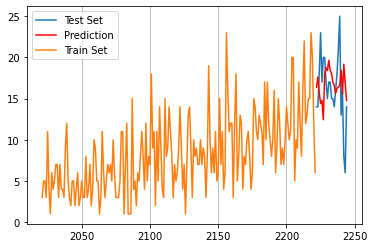

In [ ]:
# using predict() on ARIMA results to make predictions
#train to test split
#from sklearn.metrics import r2_score


X = data.values
size = int(len(X) * 0.90) #90 data
train, test = X[0:size], X[size:len(X)]
train_years, test_years  = (2021 + np.arange(0,size)) , (2021 + np.arange(size,len(X)))
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Prediksi=%f, Aktual=%f' % (yhat, obs))
#r_sq=r2_score(test, predictions)
#print('R squared: ', r_sq)

# plot
#
plt.plot(test_years, test, label="Test Set")
plt.plot(test_years, predictions, color='red', label="Prediction")
plt.plot(train_years, train, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()


In [ ]:
#MAPE SKOR
mape = np.mean(np.abs((test-predictions)/test))*100
print('Test MAPE: %.3f' % mape)

Test MAPE: 27.255


In [ ]:
x = model_fit.forecast(steps=30)

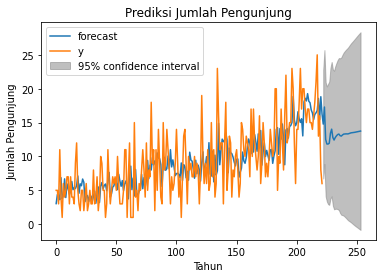

In [ ]:
model_fit.plot_predict(1,len(data_count) + 30) #predict
x = model_fit.forecast(30)[1] #Forecast
x = plt.title("Prediksi Jumlah Pengunjung")
x = plt.xlabel("Tahun") 
x = plt.ylabel("Jumlah Pengunjung")
plt.grid(False)
plt.show()

In [ ]:
hasil = model_fit.forecast(steps=30)[0] #Prediksi 30 hari kedepan

In [ ]:
hasil

array([14.77410409, 17.3003875 , 12.52596773, 11.84384794, 11.83151313,
       11.95582116, 13.4317218 , 14.03099495, 12.79411105, 12.42554312,
       12.79325406, 13.04817374, 13.23313411, 13.30896431, 13.0726598 ,
       13.00876811, 13.17477456, 13.30007226, 13.32622422, 13.33869465,
       13.32659137, 13.35100384, 13.42321615, 13.48280471, 13.50725647,
       13.53048777, 13.56035568, 13.59863492, 13.64313642, 13.68346158])

In [ ]:
data_count.tail(5)

Tanggal
2022-03-27    13
2022-03-28    16
2022-03-29     8
2022-03-30     6
2022-03-31    14
Name: id_cust, dtype: int64

In [55]:
#Estimasi 30 Hari
df = pd.DataFrame({'Jumlah Pengunjung':hasil.astype(int)}, index=pd.date_range('2022-04-01 ', '2022-04-30'))
df.index.name = 'Tanggal'

In [56]:
df

,Jumlah Pengunjung
Tanggal,
2022-04-01,14
2022-04-02,17
2022-04-03,12
2022-04-04,11
2022-04-05,11
2022-04-06,11
2022-04-07,13
2022-04-08,14
2022-04-09,12


In [ ]:
df.to_csv("Hasil_Prediksi.csv",index=True)